![AB Testing](https://miro.medium.com/v2/resize:fit:640/format:webp/1*ZpC49CtflQcUyHHLva4BTg.png)

# WHAT IS THE AB TESTING ?

A/B testing, also known as split testing, is a method of comparing two variants(A and B) to determine which one performs better. In A/B testing, two variants (A and B) are created with one element of the design or content being different between the two variants. The two versions are then shown randomly to users, and their behavior is monitored and compared to determine which variant performs better based on a predefined goal, such as the conversion rate, click-through rate, or engagement rate.

A/B testing is commonly used in website optimization, digital marketing, and product development to determine which variant is more effective at achieving a specific goal. It helps businesses make data-driven decisions by providing insight into what resonates better with their audience and what changes can be made to improve the user experience and increase conversions.

# Hypothesis Testing

Hypothesis tests are analytical tools used as a statistical method. These tests aim to test a hypothesis (claim) about a population using sample data. Hypothesis tests help us make inferences about whether a hypothesis is true or not by collecting statistical evidence.

Generally, two hypotheses are formulated: the null hypothesis (H0) and the alternative hypothesis (H1 or HA). The null hypothesis represents the existing condition or the accepted assumptions, while the alternative hypothesis claims a specific change or effect.

Hypothesis tests can be categorized into the following types:

- **One-Sample T Test:** Used to test if the mean of a population is significantly different from a specific value.

- **Independent Two-Sample T Test:** Used to test if there is a significant difference between the means of two independent groups.

- **Paired Two-Sample T Test:** Used to test if there is a significant difference between the means of two related or paired groups.

- **Analysis of Variance (ANOVA):** Used to test if there is a significant difference among the means of three or more groups.

- **Chi-Square Test:** Used to test if there is a dependency or association between two categorical variables.

- **Regression Analysis:** Used to analyze the relationship between dependent and independent variables.

These are just some popular types of hypothesis tests, and there are many more methods available in statistics. Hypothesis tests are used in various fields, ranging from scientific research and marketing strategies to medical studies and industrial quality control processes. These tests enable us to make objective decisions based on data and evaluate statistical significance.

- Hypothesis tests are statistical methods used to test a belief or proposition.

- Within the scope of hypothesis testing, there are group comparisons.

- The main objective in group comparisons is to determine whether observed differences are due to chance or if there is a genuine difference.

**For example:**

- Did the average daily usage time of users increase after a user interface change in a mobile application?

- The result we obtain from this analysis, based on the sample we have, will help us determine if the observed outcome occurred by chance or if there is indeed a significant difference.

- We will strive to understand this through statistical calculations and analysis. We will provide evidence to support our findings.

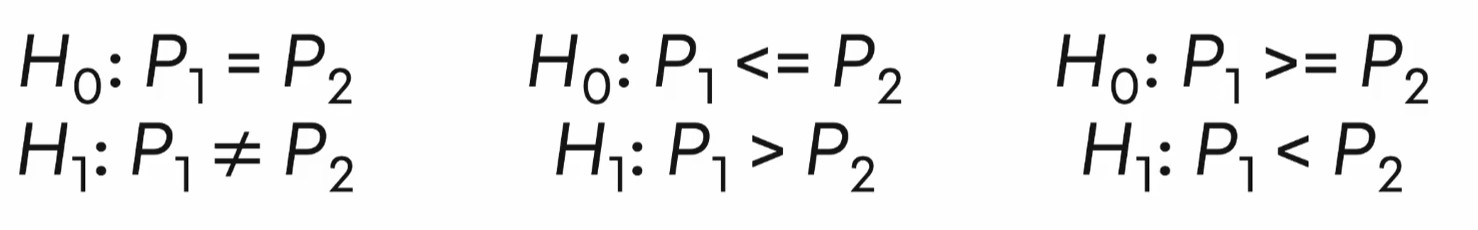

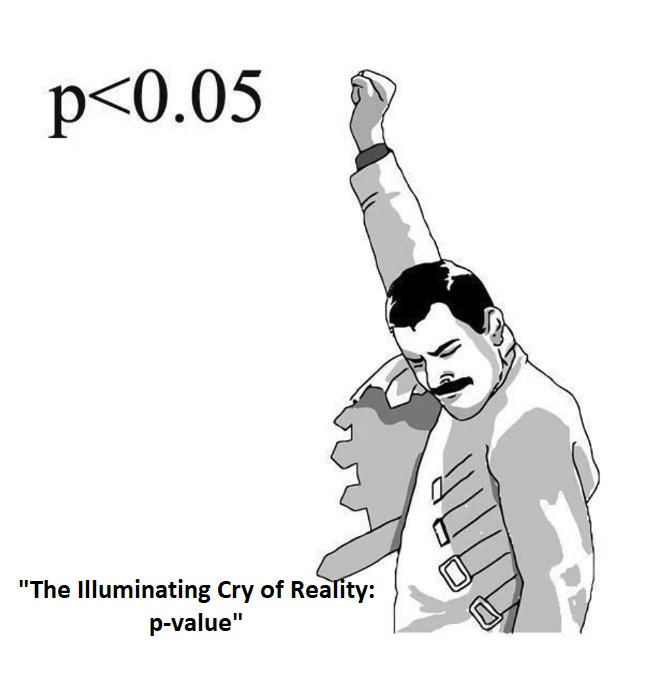

# Business Problem

- Facebook recently introduced a new type of bidding, "average bidding", as an alternative to the existing type of bidding called "maximumbidding". One of our clients, bombabomba.com, decided to test this new feature and wants to run an A/B test to see if averagebidding brings more conversions than maximumbidding. 


# Data Story

- This dataset contains a company's website information, including information such as the number of ads seen and clicked on by users, as well as the revenue generated from them. There are two separate data sets: Control and Test group. These data sets are on separate sheets of ab_testing.xlsxexcel. Maximum Bidding was applied to the control group and AverageBidding was applied to the test group.

- **impression:** Number of ad views
- **Click:** Number of clicks on the displayed ad
- **Purchase:** Number of products purchased after clicked ads
- **Earning:** Earnings from purchased products

# Comparing the Conversion of Bidding Methods with the AB Test

In [1]:
# import Required Libraries

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# Loading the Data Set

dataframe_control = pd.read_excel("/kaggle/input/ab-test12/ab_testing.xlsx" , sheet_name="Control Group")
dataframe_test = pd.read_excel("/kaggle/input/ab-test12/ab_testing.xlsx" , sheet_name="Test Group")

In [4]:
df_control = dataframe_control.copy()
df_test = dataframe_test.copy()

In [5]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_control)
check_df(df_test)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
    Impression      Click  Purchase    Earning
0  82529.45927 6090.07732 665.21125 2311.27714
1  98050.45193 3382.86179 315.08489 1742.80686
2  82696.02355 4167.96575 458.08374 1797.82745
3 109914.40040 4910.88224 487.09077 1696.22918
4 108457.76263 5987.65581 441.03405 1543.72018
##################### Tail #####################
     Impression      Click  Purchase    Earning
35 132064.21900 3747.15754 551.07241 2256.97559
36  86409.94180 4608.25621 345.04603 1781.35769
37 123678.93423 3649.07379 476.16813 2187.72122
38 101997.49410 4736.35337 474.61354 2254.56383
39 121085.88122 4285.17861 590.40602 1289.30895
##################### NA #####################
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int6

In [6]:
df_control["group"] = "control"
df_test["group"] = "test"

In [7]:
df = pd.concat([df_control,df_test], axis=0,ignore_index=False)

In [8]:
df.head()

,Impression,Click,Purchase,Earning,group
0,82529.45927,6090.07732,665.21125,2311.27714,control
1,98050.45193,3382.86179,315.08489,1742.80686,control
2,82696.02355,4167.96575,458.08374,1797.82745,control
3,109914.40040,4910.88224,487.09077,1696.22918,control
4,108457.76263,5987.65581,441.03405,1543.72018,control


# Establishing the Hypothesis of the A/B Test

- **H0 : M1 = M2** (There is no difference between control group and test group purchase averages)
- **H1 : M1!= M2** (There is a difference between control group and test group purchase averages.)

In [9]:
df.groupby("group").agg({"Purchase": "mean"})

,Purchase
group,
control,550.89406
test,582.10610


# Implementation of Hypothesis Testing

- Assumption checks are made before hypothesis testing.
- These are Normality Assumption and Variance Homogeneity.

In [10]:
# We tested whether the control and test groups complied with the normality assumption separately on the Purchase variable.

**Assumption of Normality**

- **H0:** Assumption of normal distribution is satisfied.
- **H1:** Normal distribution assumption is not satisfied

In [11]:
test_stat, pvalue = shapiro(df.loc[df["group"] == "control", "Purchase"])

In [12]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


In [13]:
# H0 cannot be rejected. 
# The values of the Control group fulfill the assumption of normal distribution.

**Homogeneity of Variance**
- **H0:** Variances are homogeneous.
- **H1:** Variances are not homogeneous.

In [14]:
test_stat, pvalue = levene(df.loc[df["group"] == "control", "Purchase"],
                           df.loc[df["group"] == "test", "Purchase"])

In [15]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


In [16]:
# H0 cannot be rejected. 
# Control and Test group values satisfy the assumption of variance homogeneity.
# Variances are homogeneous.

**Since the appropriate test assumptions are met according to the Normality Assumption and Variance Homogeneity results, an independent two sample t-test (parametric test) is performed.**

In [17]:
# H0: M1 = M2 (There is no statistically significant difference between the control group and test group purchase averages)
# H1: M1 != M2 (There is a statistically significant difference between control group and test group purchase averages)
# p<0.05 HO REJECTED, p>0.05 HO NOT REJECTED

In [18]:
test_stat, pvalue = ttest_ind(df.loc[df["group"] == "control", "Purchase"],
                              df.loc[df["group"] == "test", "Purchase"],
                              equal_var=True)

In [19]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


In [20]:
# H0 cannot be rejected. 
# There is no statistically significant difference between control and test group purchase averages.

# Analysis of the Results

In [21]:
# First, normality test was applied to both groups. 
# Since it was observed that both groups fit the normal distribution, the homogeneity of variance was examined by moving on to the second assumption. 
# Since the variances were homogeneous, independent Two Sample T Test was applied. 
# As a result of the application, it was observed that the p-value was greater than 0.05. Therefore, H0 hypothesis could not be rejected.

In [22]:
# Since there is no significant difference in terms of purchase, the customer can choose one of the two methods, but differences in other statistics will also be important here. 
# Differences in Clicks, Interaction, Earnings and Conversion Rates can be evaluated to determine which method is more profitable. 
# Especially since Facebook is paid per click, it can be determined which method has a lower click-through rate and look at the CTR (Click-True-Rate) rate. 
# The two groups continue to be observed.